<a href="https://colab.research.google.com/github/andyathsid/dopamin_amazon_reviews_sentiment_analysis_hybrid_benchmarking/blob/main/notebooks/SVM_TF_IDF_Fesmaro_Dopamine_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install wget
!pip install gensim
!pip install --upgrade gensim
!pip install numpy==1.25.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import warnings
import opendatasets as od
from textblob import TextBlob
import nltk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gensim.models.keyedvectors import KeyedVectors
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.metrics import classification_report
import os
import wget
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
od.download("https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews/data", force_download=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: satriatamaputra
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews


100%|██████████| 1.29G/1.29G [00:08<00:00, 165MB/s]


In [20]:
df_train = pd.read_csv('/content/amazon-reviews/train.csv')

df_test = pd.read_csv('/content/amazon-reviews/test.csv')

In [21]:
df_train.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [22]:
df_test.head()

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [23]:
df_train = pd.read_csv('/content/amazon-reviews/train.csv', header=None, names=['polarity', 'title', 'text'])
df_test = pd.read_csv('/content/amazon-reviews/test.csv', header=None, names=['polarity', 'title', 'text'])

In [24]:
df_train.head()

,polarity,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [25]:
df_test.head()

,polarity,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [26]:
combined_df = pd.concat([df_train, df_test], ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 91.6+ MB


In [27]:
duplicates = combined_df[combined_df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [28]:
nan_count = combined_df.isnull().sum().sum()
print(f"Total number of NaN values: {nan_count}")

Total number of NaN values: 231


In [29]:
nan_rows = combined_df[combined_df.isnull().any(axis=1)]

print(nan_rows)

         polarity title                                               text
13265           1   NaN  Couldn't get the device to work with my networ...
26554           1   NaN  What separates this band from Evanescence (bes...
26827           2   NaN  Falkenbach returns with more of the Viking/Fol...
36598           2   NaN  I returned this because I received the same on...
37347           2   NaN  This book is a great fantasy. I love this amaz...
...           ...   ...                                                ...
3878775         1   NaN  Did anyone notice that this "book" was publshe...
3918873         1   NaN  cute concept. gets bad and then gets really ba...
3939814         1   NaN  Just wanted to vote the one star to bring the ...
3963777         2   NaN  Fine book! What a nice experience. The book wa...
3971802         1   NaN  This book is not on par to the first two in th...

[231 rows x 3 columns]


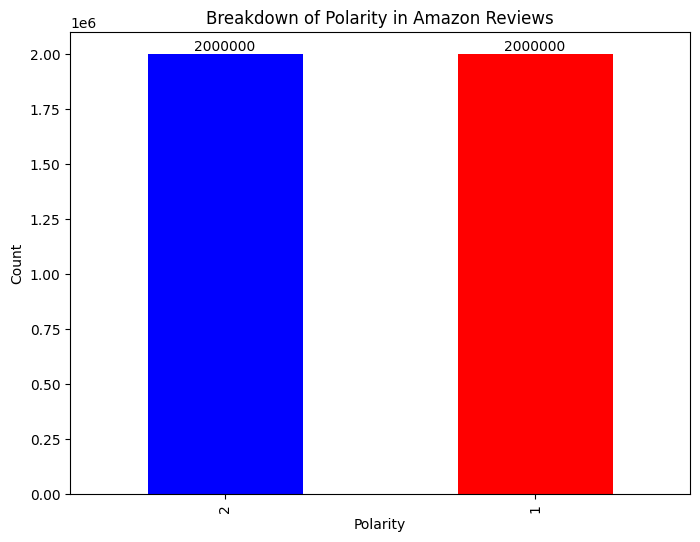

In [30]:
polarity_counts = combined_df['polarity'].value_counts()

plt.figure(figsize=(8,6))
polarity_counts.plot(kind='bar', color=['blue', 'red'])

plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Breakdown of Polarity in Amazon Reviews')

for index, value in enumerate(polarity_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [34]:
subset_fraction = 0.01

subset_df = combined_df.sample(frac=subset_fraction, random_state=42)

print(f"Subset size: {len(subset_df)} rows")
subset_df.head()

Subset size: 40000 rows


,polarity,title,text
1049554,1,"Deeply disappointing, faulty morality & social...","The book delves very little into art, aside fr..."
214510,2,insight into the philosophy of libertarian soc...,"In ""The Limits of State Action"" Enlightenment ..."
2145764,2,a great book,"""In vain did the Bedouins strive to cut down a..."
2198867,1,toys for great sex,"wow, that was bad, I threw it away after watch..."
1184366,2,i love this movie!!!!,i just finished reading Someone Like You and i...


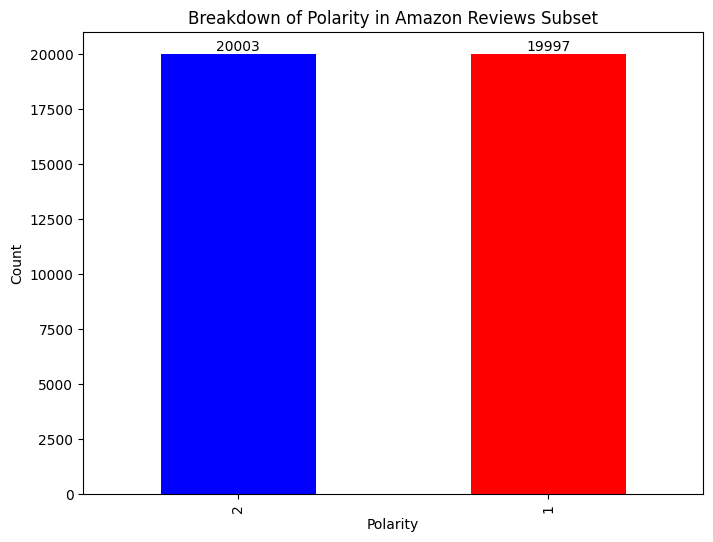

In [35]:
polarity_counts = subset_df['polarity'].value_counts()

plt.figure(figsize=(8,6))
polarity_counts.plot(kind='bar', color=['blue', 'red'])

plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Breakdown of Polarity in Amazon Reviews Subset')

for index, value in enumerate(polarity_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [36]:
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Replace all numbers with 0
    text = re.sub(r'\d+', '0', text)

    # Remove website URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    return text

subset_df["clean_text"] =  subset_df["title"] + " " + subset_df["text"]
subset_df["clean_text"] =  subset_df["clean_text"].apply(clean_text)

In [37]:
subset_df.head()

,polarity,title,text,clean_text
1049554,1,"Deeply disappointing, faulty morality & social...","The book delves very little into art, aside fr...",deeply disappointing faulty morality social pe...
214510,2,insight into the philosophy of libertarian soc...,"In ""The Limits of State Action"" Enlightenment ...",insight into the philosophy of libertarian soc...
2145764,2,a great book,"""In vain did the Bedouins strive to cut down a...",a great book in vain did the bedouins strive t...
2198867,1,toys for great sex,"wow, that was bad, I threw it away after watch...",toys for great sex wow that was bad i threw it...
1184366,2,i love this movie!!!!,i just finished reading Someone Like You and i...,i love this movie i just finished reading some...


In [39]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

try:
    sid = SentimentIntensityAnalyzer()
except:
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()

# Function to get TextBlob sentiment polarity
def get_textblob_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_vader_scores(text):
    return sid.polarity_scores(text)

print("Calculating sentiment scores...")
subset_df['textblob_polarity'] = subset_df['clean_text'].apply(get_textblob_polarity)

vader_scores = subset_df['clean_text'].apply(get_vader_scores)
subset_df['vader_compound'] = vader_scores.apply(lambda x: x['compound'])
subset_df['vader_pos'] = vader_scores.apply(lambda x: x['pos'])
subset_df['vader_neg'] = vader_scores.apply(lambda x: x['neg'])
subset_df['vader_neu'] = vader_scores.apply(lambda x: x['neu'])

Calculating sentiment scores...


In [42]:
# Prepare data for SVM model
print("Preparing data for SVM classification...")

X_text = subset_df['clean_text']
y = subset_df['polarity']


X_sentiment = subset_df[['textblob_polarity', 'vader_compound', 'vader_pos', 'vader_neg', 'vader_neu']].values


X_text_train, X_text_test, X_sentiment_train, X_sentiment_test, y_train, y_test = train_test_split(
    X_text, X_sentiment, y, test_size=0.2, random_state=42)

Preparing data for SVM classification...


In [43]:
# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(
    min_df=5,
    max_df=0.8,
    sublinear_tf=True,
    use_idf=True,
    ngram_range=(1, 2)
)

X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)

X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test)

Training the SVM model without sentiment features...

Model Evaluation:
Accuracy: 0.9030

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.90      0.90      3987
           2       0.90      0.91      0.90      4013

    accuracy                           0.90      8000
   macro avg       0.90      0.90      0.90      8000
weighted avg       0.90      0.90      0.90      8000



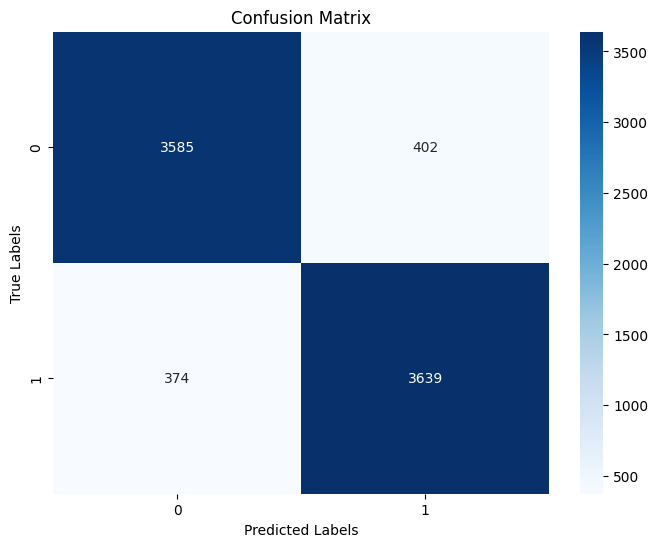

In [48]:
# # Combine TF-IDF features with sentiment features
# from scipy.sparse import hstack
# X_train_combined = hstack((X_text_train_tfidf, X_sentiment_train)).tocsr()
# X_test_combined = hstack((X_text_test_tfidf, X_sentiment_test)).tocsr()

# # Train SVM with a linear kernel (LinearSVC)
# print("Training the SVM model...")
# svm_classifier = LinearSVC(
#     C=1.0,
#     class_weight='balanced',
#     max_iter=10000,
# )

# # Train the model
# svm_classifier.fit(X_train_combined, y_train)

# # Make predictions
# y_pred = svm_classifier.predict(X_test_combined)


# Train SVM with a linear kernel (LinearSVC) without sentiment features
print("Training the SVM model without sentiment features...")
svm_classifier = LinearSVC(
    C=1.0,                  # Regularization parameter
    class_weight='balanced', # Handle class imbalance
    max_iter=10000,         # Maximum iterations
)

# Train the model using only TF-IDF features
svm_classifier.fit(X_text_train_tfidf, y_train)

# Make predictions using only TF-IDF features
y_pred = svm_classifier.predict(X_text_test_tfidf)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()